# Data Scientist Associate Case Study

## Company Background
GoalZone is a fitness club chain providing five types of fitness classes in Canada. Finally, the fitness classes schedule is back to normal after the COVID-19 restrictions are lifted. However, they have received many complaints from the customers about having a hard time booking a fitness class.

From initial analysis, the program operation team found out that the fitness classes are always fully booked but are having a low attendance rate per class. To improve this situation, they would like to increase the class capacity for customers to sign up if a low attendance rate is predicted.  


## Customer Question
The operation manager has asked you to answer the following:
- Can you predict the attendance rate for each fitness class? 



## Dataset
The dataset contains the attendance information for the class scheduled this year so far. The data you will use for this analysis can be accessed here: `"data/fitness_class.csv"`

| Column Name                     | Criteria                                                                                                                                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Day of Week                     | Character, the day of the week the class was scheduled, one of values from “Mon” to “Sun”.                                                                                      |
| Time                            | Character, the time of the day the class was scheduled, either "AM" or "PM".                                                                                                        |
| Class Category                  | Character, the category of the fitness class, one of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”.                                                                          |
| Days Before                     | Numeric, number of days the class stayed fully booked, maximum five days.                                                                                                       |
| Class Capacity                  | Numeric, maximum number of members can sign up for that class, either 15 or 25.  The class capacity being 26 needs to be updated to 25.                                         |
| Attendance                      | Numeric, number of members actually attended the class.                                                                                                                         |
| Average Age                     | Numeric, average age of the members signing up for that class.  Remove rows that average age is smaller than 14 because group fitness class are for members aged 14 and order.  |
| Number of New Students          | Numeric, number of new students signing up for this class.                                                                                                                      |
| Number of Members Over 6 months | Numeric, number of members signing up for the class have been joining the club more than 6 months.                                                                              |                                                                                     |

# Data Scientist Associate Case Study Submission

Use this template to complete your analysis and write up your summary for submission.


In [186]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Start coding here... 
df= pd.read_csv('data/fitness_class.csv')
df.head()

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
0,Wed,AM,Yoga,15,1,8,31.1,6,4
1,Sun,PM,Aqua,15,3,8,27.0,7,8
2,Mon,AM,Aqua,15,5,10,22.4,8,7
3,Sun,PM,Strength,25,3,18,23.5,7,9
4,Mon,AM,Yoga,15,5,10,29.8,5,7


## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

*Write your description here: 

The feature named 'attendance' is the target feature in this data. 
Data types for all features are correct as per the crieterion mentioned. For class category the data type was initial object but that has been changed to category type using astype. 
Also for age, where age was less than 14 those instances have been dropped. Likewise, for class capacity any instance with capacity greater than 25 has been changed to 25. 
I also validated the data with respect null values and there was no missing value in the data. 
Lastly, five point summary for continous features is calculated and for categorical features mode is calculated. 
I have also checked the cardinality for numeric features and in this cardinality for class capacity was only two. So I have converted class capacity into category.

In [3]:
# checking the datatypes for all features
df.dtypes

day_of_week        object
time               object
class_category     object
class_capacity      int64
days_before         int64
attendance          int64
age               float64
new_students        int64
over_6_month        int64
dtype: object

day_of_week           object
time                  object
class_category      category
class_capacity      category
days_before            int64
attendance             int64
age                  float64
new_students           int64
over_6_month           int64
attendance_label       int64
dtype: object

In [4]:
# as the class_category is a category so we will convert the object into category types

df['class_category']= df['class_category'].astype('category')

In [5]:
## changing the values greater than 25 to 25 in class_capacity
df['class_capacity'] = df['class_capacity'].apply(lambda x : 25 if x >25 else x)
max(df['class_capacity']) # now the values greater than 25 are changed to 25

25

In [6]:
# age should starts from 14 , so any value is less than 14 we will remove those instances 
df[df['age'] < 14].age.value_counts()

8.3     1
13.6    1
11.3    1
Name: age, dtype: int64

In [7]:
# there is three instances with age less than 14 
df[df['age']<14]

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
55,Fri,AM,Strength,25,4,21,8.3,7,11
104,Sat,PM,Yoga,25,1,21,13.6,6,10
165,Thu,AM,Yoga,25,3,20,11.3,9,11


In [8]:
# hence dropping these three instances. 
df.drop([55,104,165], axis= 0, inplace= True)

In [9]:
df.days_before.max() # the range for days booked is correct 

5

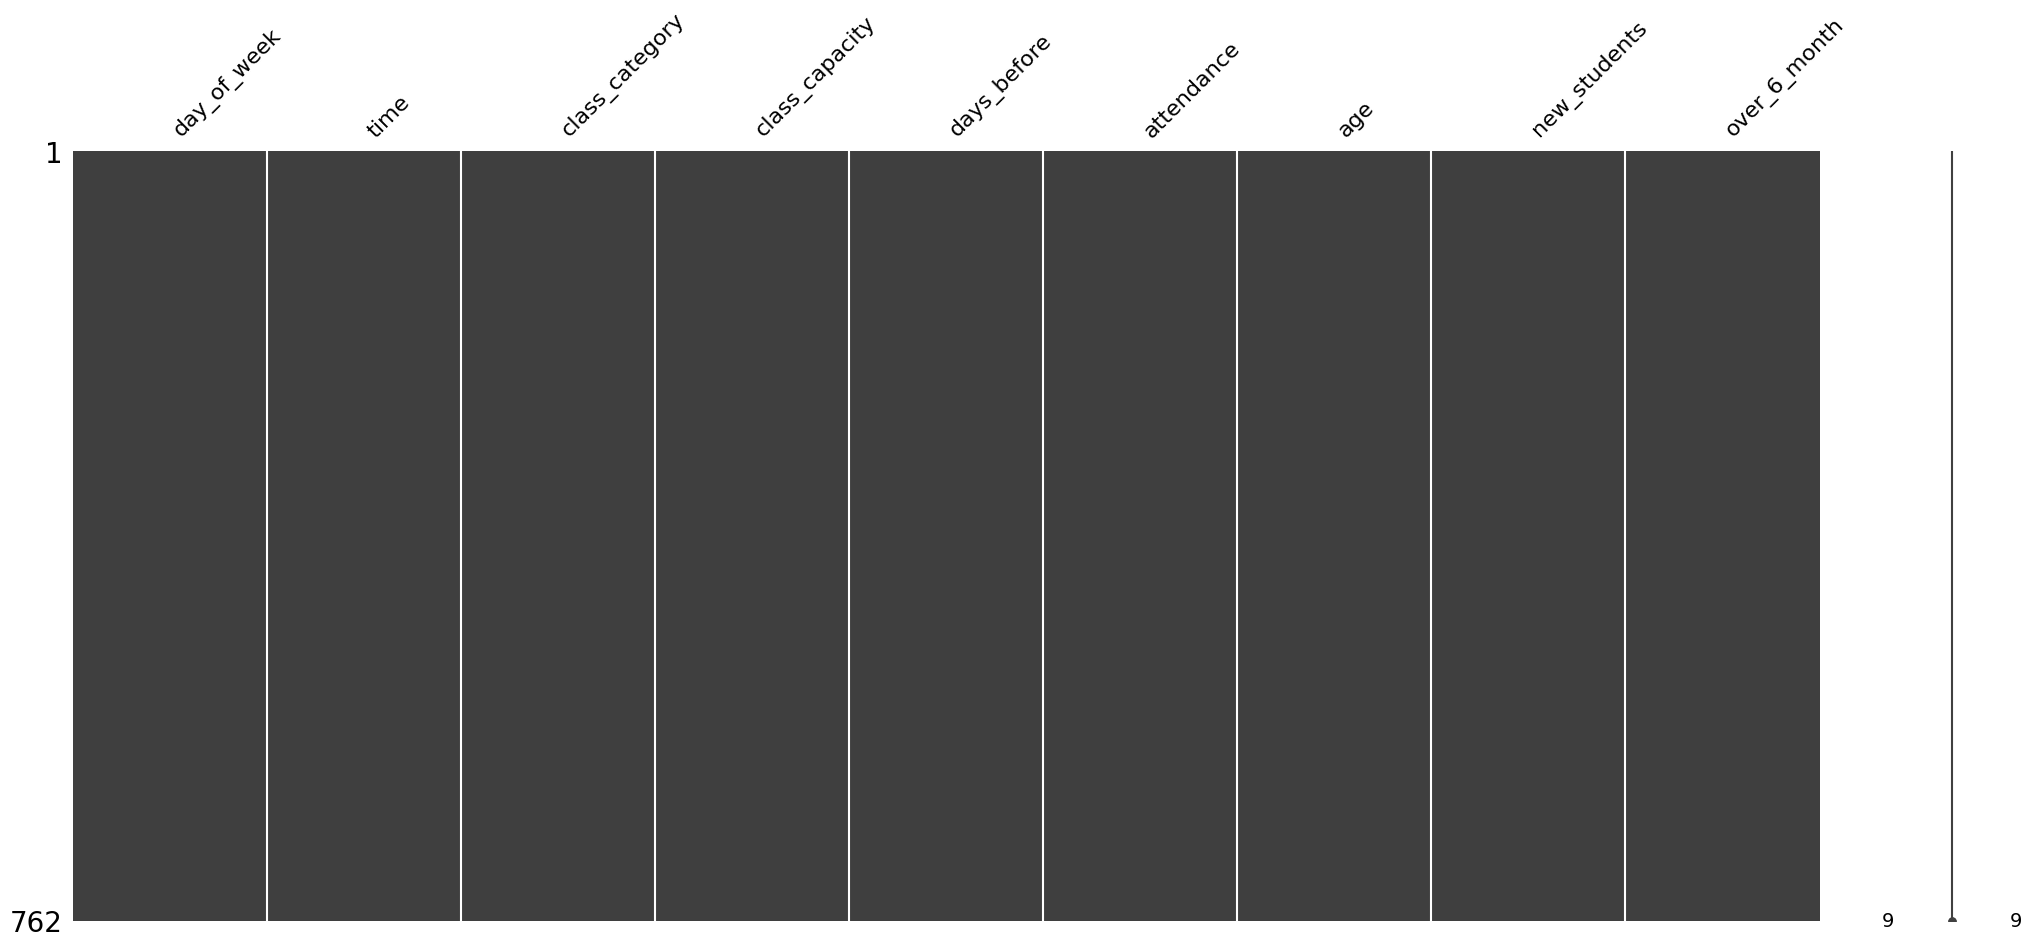

In [10]:
## checking for missing values using missingno

import missingno as msno
import matplotlib.pyplot as plt
# Visualize missingness
msno.matrix(df)
plt.show()

# the graph below shows that there are no missing values 

In [11]:
## Data Quality Report for continous and categorical variables 

In [12]:
df.select_dtypes(include=['int','float']).describe()

,class_capacity,days_before,attendance,age,new_students,over_6_month
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,17.506562,2.547244,9.519685,29.163648,5.912073,7.565617
std,4.336755,1.355768,3.841164,5.812547,1.788821,1.968617
min,15.000000,1.000000,4.000000,14.000000,1.000000,2.000000
25%,15.000000,1.000000,7.000000,25.300000,5.000000,6.000000
50%,15.000000,2.000000,9.000000,29.000000,6.000000,8.000000
75%,22.500000,4.000000,11.000000,33.200000,7.000000,9.000000
max,25.000000,5.000000,21.000000,48.800000,11.000000,13.000000


In [13]:
df1= df.select_dtypes(include=['int','float'])
d= {}
for col in df1.columns: 
    d[col] = [df1[col].nunique()]
print(d)

{'class_capacity': [2], 'days_before': [5], 'attendance': [18], 'age': [231], 'new_students': [11], 'over_6_month': [12]}


In [14]:
## from here we can see that class capacity and day_before cardinality is too low wrt to continous features. So we can convert class_capacity features into nominal data. for days_before we are not converting because we might need to calcuated average days booked etc. in our analysis. 


In [15]:
# converting class capacity into category 
df['class_capacity'] = df['class_capacity'].astype('category')

In [16]:
df.select_dtypes(exclude=['int','float']).describe()

,day_of_week,time,class_category,class_capacity
count,762,762,762,762
unique,7,2,5,2
top,Thu,PM,Yoga,15
freq,126,395,173,571


## Description
The feature named 'attendance' is the target feature in this data. 
Data types for all features are correct as per the crieterion mentioned. For class category the data type was initial object but that has been changed to category type using astype. 
Also for age, where age was less than 14 those instances have been dropped. Likewise, for class capacity any instance with capacity greater than 25 has been changed to 25. 
I also validated the data with respect null values and there was no missing value in the data. 
Lastly, five point summary for continous features is calculated and for categorical features mode is calculated. 
I have also checked the cardinality for numeric features and in this cardinality for class capacity was only two. So I have converted class capacity into category.

In [17]:
# In our analysis attendence is the target variable in our model. 

## EDA 

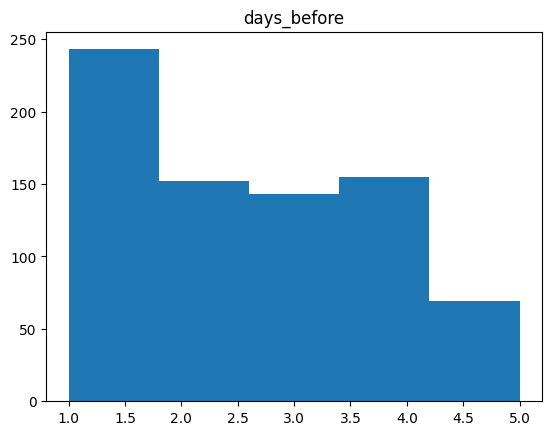

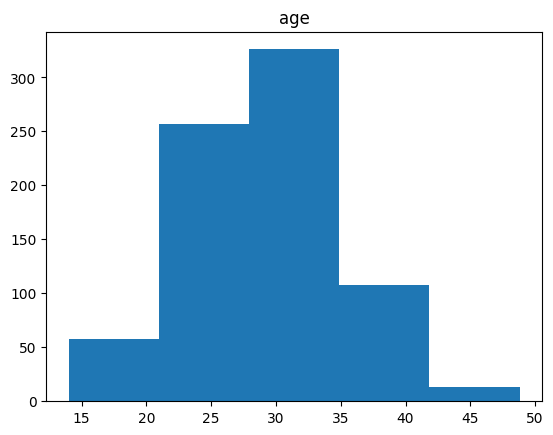

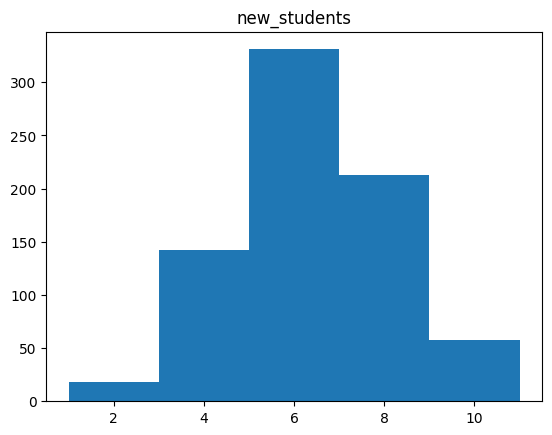

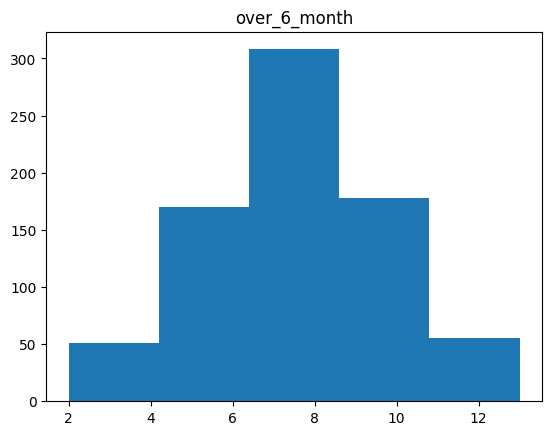

In [18]:
# Checking the distribution for continous features as this will give us idea which features are skewed or normal 

df1= df.select_dtypes(include=['int','float'])
for col in df1.columns:
    if col != 'attendance':
     plt.hist(df[col], bins= 5)
     plt.title(col)
     plt.show()

In [ ]:
## from the histogram above we can see that days before is not normally distributed. Infact it seems to be right skewed. Rest all features are normally distributed. 

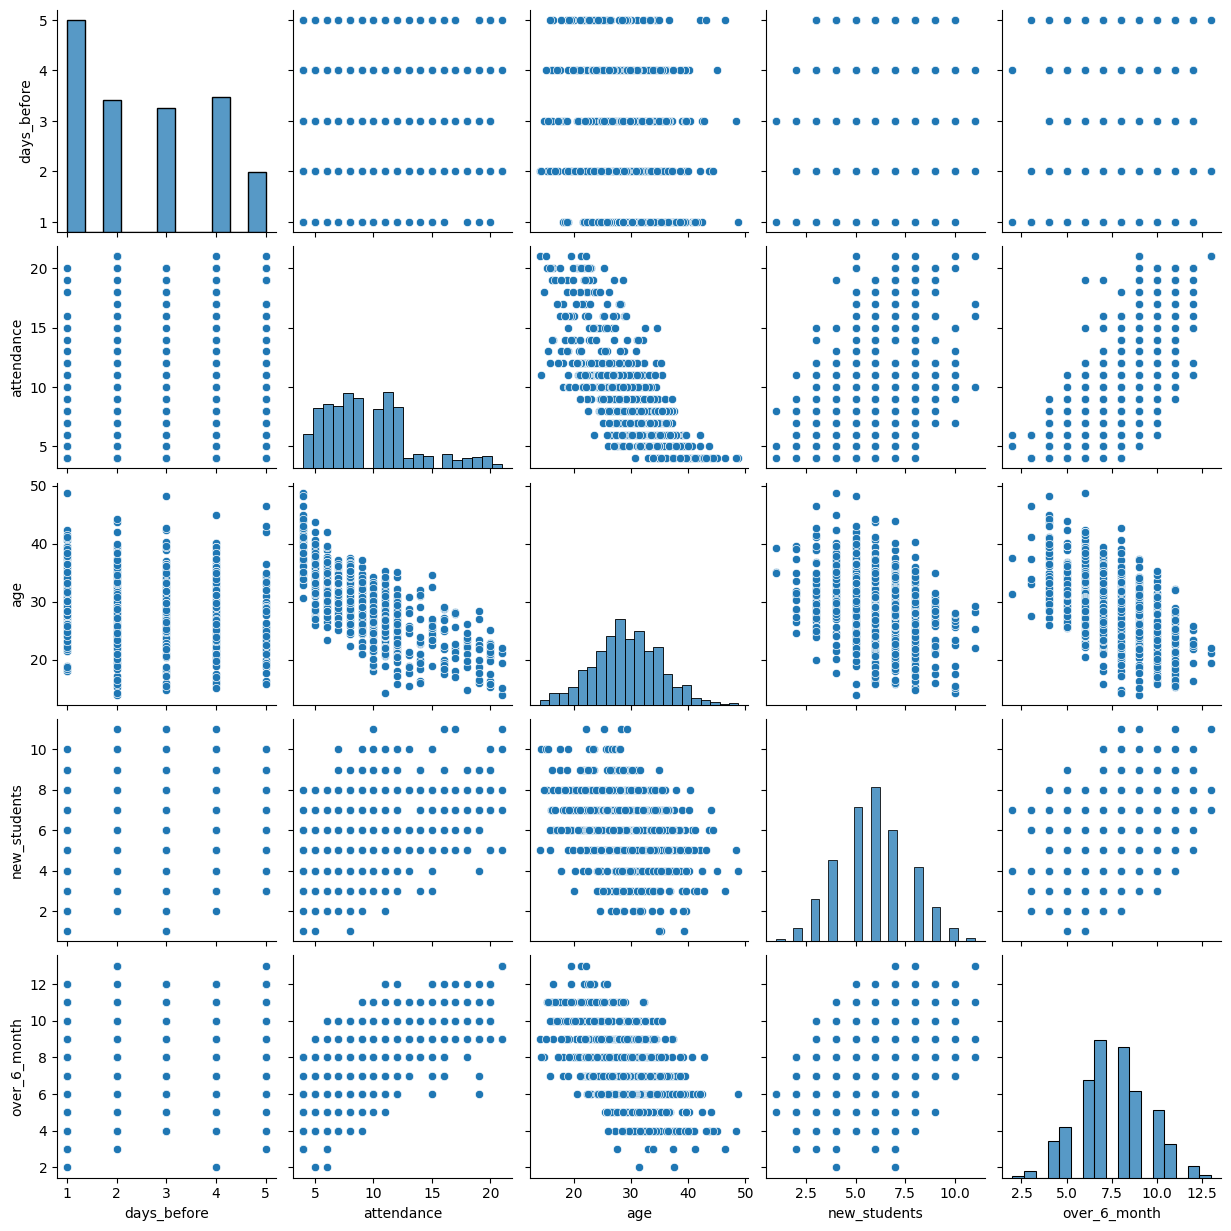

In [19]:
## we will create pairplot to see if there is no multicollinearity between different continous features. 

sns.pairplot(df1)

In [67]:
df1.corr()

,days_before,attendance,age,new_students,over_6_month
days_before,1.000000,0.272084,-0.213646,0.142320,0.183220
attendance,0.272084,1.000000,-0.734209,0.463347,0.694935
age,-0.213646,-0.734209,1.000000,-0.375154,-0.568190
new_students,0.142320,0.463347,-0.375154,1.000000,0.360801
over_6_month,0.183220,0.694935,-0.568190,0.360801,1.000000


In [131]:
## from the pair plot above and correlation coefficient above we can see that attendance is negatively related with age with correlation coefficient -0.734. Also, it is linearly correlated with new students and over 6 months. 
#with respect to multicollinearity, there is no such feature. A linear relationship was observed between over 6months and new students but from correlation table, they are not so related. 

In [132]:
# relation b/w categorical variable and target feature

In [133]:
df2= df.select_dtypes(exclude=['int','float'])
df2

,day_of_week,time,class_category,class_capacity
0,Wed,AM,Yoga,15
1,Sun,PM,Aqua,15
2,Mon,AM,Aqua,15
3,Sun,PM,Strength,25
4,Mon,AM,Yoga,15
...,...,...,...,...
760,Sat,AM,Aqua,15
761,Sat,PM,Aqua,15
762,Sun,AM,Cycling,15
763,Sun,PM,Strength,15


<AxesSubplot:xlabel='day_of_week', ylabel='attendance'>

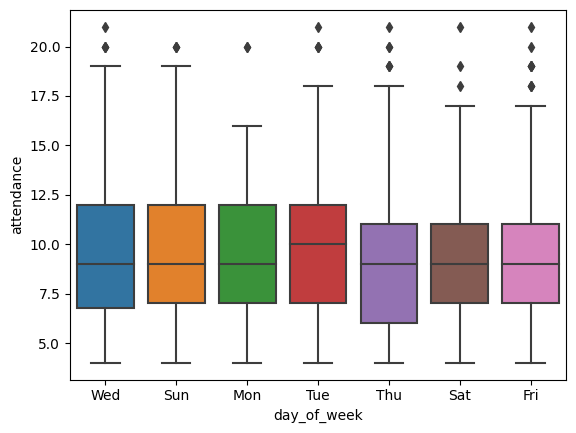

In [134]:
sns.boxplot(data=df, x='day_of_week',y='attendance')

<AxesSubplot:xlabel='class_category', ylabel='attendance'>

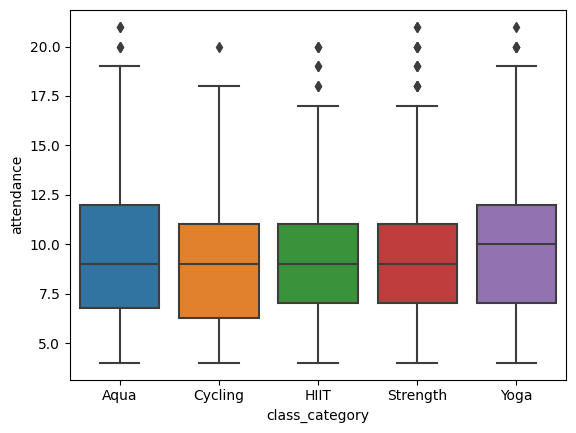

In [135]:
sns.boxplot(data=df, x='class_category',y='attendance')

<AxesSubplot:xlabel='class_capacity', ylabel='attendance'>

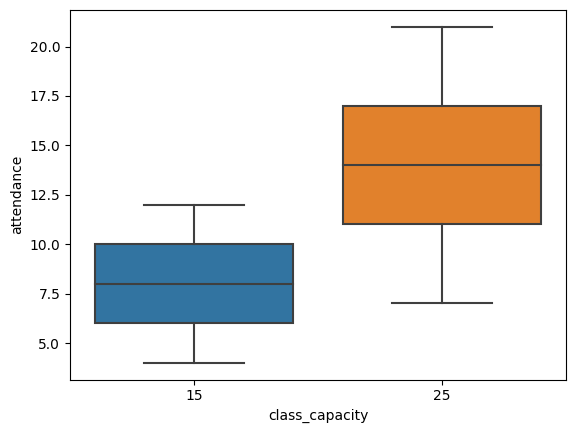

In [136]:
sns.boxplot(data=df, x='class_capacity',y='attendance')

#### with respect to box plot above, we cna see that there is relationship between attendance and class_Capacity. with respect to class category the median values are almost similar and same goes for day_of_week also. To find that if there is any relationship between attendance and these two category we will also cross check using pairwise anova test.where;

#### H0: there is no difference in attendance wrt to different groups in categorical feature
### Ha: there is difference in attendance wrt different groups 

#### significance level is set at : 0.05

In [138]:
pip install pingouin

  Using cached pingouin-0.5.2-py3-none-any.whl
  Using cached pandas_flavor-0.3.0-py3-none-any.whl (6.3 kB)
  Using cached pandas-1.5.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Using cached scipy-1.9.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.8 MB)
  Using cached statsmodels-0.13.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.9 MB)
  Using cached numpy-1.23.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached scikit_learn-1.0.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
  Using cached outdated-0.2.2-py2.py3-none-any.whl (7.5 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Using cached matplotlib-3.6.1-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Using cached contourpy-1.0.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (295 kB)
  Using cached pyparsing-3.0.9-py3-none-a

In [139]:
import pingouin


In [140]:
pingouin.pairwise_tests(data= df, dv='attendance', between='day_of_week', padjust= 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,day_of_week,Fri,Mon,False,True,0.338014,182.352221,two-sided,0.735741,1.0,bonf,0.168,0.049307
1,day_of_week,Fri,Sat,False,True,0.821226,179.932796,two-sided,0.412604,1.0,bonf,0.214,0.118407
2,day_of_week,Fri,Sun,False,True,-0.485366,198.207609,two-sided,0.627953,1.0,bonf,0.169,-0.067296
3,day_of_week,Fri,Thu,False,True,1.036158,192.322288,two-sided,0.301430,1.0,bonf,0.246,0.142207
4,day_of_week,Fri,Tue,False,True,-0.510827,192.550756,two-sided,0.610057,1.0,bonf,0.17,-0.070738
5,day_of_week,Fri,Wed,False,True,0.228144,195.086247,two-sided,0.819774,1.0,bonf,0.155,0.031700
6,day_of_week,Mon,Sat,False,True,0.495867,184.523781,two-sided,0.620578,1.0,bonf,0.176,0.071740
7,day_of_week,Mon,Sun,False,True,-0.871238,202.319446,two-sided,0.384657,1.0,bonf,0.217,-0.119951
8,day_of_week,Mon,Thu,False,True,0.725418,201.114821,two-sided,0.469039,1.0,bonf,0.191,0.098430
9,day_of_week,Mon,Tue,False,True,-0.915759,199.966633,two-sided,0.360896,1.0,bonf,0.224,-0.125712


In [141]:
pingouin.pairwise_tests(data= df, dv='attendance', between='class_category', padjust= 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,class_category,Yoga,Aqua,False,True,0.615973,326.713960,two-sided,0.538341,1.0,bonf,0.145,0.067504
1,class_category,Yoga,Strength,False,True,0.258254,328.416337,two-sided,0.796372,1.0,bonf,0.125,0.028220
2,class_category,Yoga,HIIT,False,True,1.150189,296.787319,two-sided,0.250992,1.0,bonf,0.237,0.130607
3,class_category,Yoga,Cycling,False,True,1.596728,292.234310,two-sided,0.111407,1.0,bonf,0.43,0.181901
4,class_category,Aqua,Strength,False,True,-0.341936,319.995662,two-sided,0.732623,1.0,bonf,0.13,-0.038018
5,class_category,Aqua,HIIT,False,True,0.515537,293.161318,two-sided,0.606567,1.0,bonf,0.145,0.059502
6,class_category,Aqua,Cycling,False,True,0.929424,287.042177,two-sided,0.353450,1.0,bonf,0.196,0.107773
7,class_category,Strength,HIIT,False,True,0.854742,295.316653,two-sided,0.393387,1.0,bonf,0.181,0.098194
8,class_category,Strength,Cycling,False,True,1.274334,289.155135,two-sided,0.203568,1.0,bonf,0.281,0.146971
9,class_category,HIIT,Cycling,False,True,0.401515,264.879899,two-sided,0.688365,1.0,bonf,0.145,0.048927


In [142]:
## after conducting the anova test for these two features we can see none of the p-value are less than significance level. from there we can say that we fail to reject the null hypothesis. That is there no such significant difference between two groups. Hence in modelling, we will not be considering day_of_week and class_category features.

In [143]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data

# Start coding here... 


## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

*Write your description here*





#### EDA
1. from the histogram above we can see that days before is not normally distributed. Infact it seems to be right skewed. Rest all features are normally distributed.
2. from the pair plot above and correlation coefficient above we can see that attendance is negatively related with age with correlation coefficient -0.734. Also, it is linearly correlated with new students and over 6 months. with respect to multicollinearity, there is no such feature. A linear relationship was observed between over 6months and new students but from correlation table, they are not so related. 
3.with respect to box plot above, we cna see that there is relationship between attendance and class_Capacity. with respect to class category the median values are almost similar and same goes for day_of_week also. To find that if there is any relationship between attendance and these two category we will also cross check using pairwise anova test.where;

H0: there is no difference in attendance wrt to different groups in categorical feature
Ha: there is difference in attendance wrt different groups 
significance level is set at : 0.05
after conducting the anova test for these two features we can see none of the p-value are less than significance level. from there we can say that we fail to reject the null hypothesis. That is there no such significant difference between two groups. Hence in modelling, we will not be considering day_of_week and class_category features.


## Modelling Phase

In [144]:
df

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
0,Wed,AM,Yoga,15,1,8,31.1,6,4
1,Sun,PM,Aqua,15,3,8,27.0,7,8
2,Mon,AM,Aqua,15,5,10,22.4,8,7
3,Sun,PM,Strength,25,3,18,23.5,7,9
4,Mon,AM,Yoga,15,5,10,29.8,5,7
...,...,...,...,...,...,...,...,...,...
760,Sat,AM,Aqua,15,1,4,38.5,5,6
761,Sat,PM,Aqua,15,1,4,41.2,6,3
762,Sun,AM,Cycling,15,4,12,26.1,8,9
763,Sun,PM,Strength,15,1,7,33.3,5,7


In [145]:
# we will be taking numeric features only because as per the eda above, there is no such relationship between target and categorical feature.

In [146]:
X= df[['days_before','new_students','over_6_month','class_capacity','age']].values
y= df['attendance'].values

In [147]:
## scaling the data so all numerical values are in required range. we will use MinMaxScalerr in this. 
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X= scaler.fit_transform(X)

## Linear Regression

In [148]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()

In [149]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X,y, train_size=0.7, random_state=42)

In [150]:
linreg.fit(x_train,y_train)
pred= linreg.predict(x_test)

In [151]:
print(linreg.score(x_test,y_test))

0.7549197655518238


In [152]:
newval= pd.DataFrame({'pred':pred, 'actual':y_test})

In [153]:
newval

,pred,actual
0,7.185734,4
1,8.281562,10
2,7.855991,8
3,4.489377,5
4,14.031103,12
...,...,...
224,8.566353,7
225,10.179752,12
226,15.310620,19
227,8.320619,7


## Decision Tree Regressor

In [154]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor()

In [155]:
regressor.fit(x_train,y_train)
pred= regressor.predict(x_test)

In [156]:
print(regressor.score(x_test,y_test))

0.5067209887624404


## RandomForestRegressor

In [157]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor()

In [158]:
regressor.fit(x_train,y_train)
pred= regressor.predict(x_test)

In [159]:
print(regressor.score(x_test,y_test))

0.7193969524933114


## GradientBoostingRegressor

In [160]:
from sklearn.ensemble import GradientBoostingRegressor


In [161]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x_train, y_train)

pred= reg.predict(x_test)

print(reg.score(x_test,y_test))

0.7576294112270348


## KNeighborsRegressor

In [162]:
from sklearn.neighbors import KNeighborsRegressor
reg= KNeighborsRegressor(n_neighbors= 3)
reg.fit(x_train,y_train)
pred= reg.predict(x_test)
print(reg.score(x_test,y_test))

0.6994357279197666


## VotingRegressor

In [163]:
from sklearn.ensemble import VotingRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()
r4= GradientBoostingRegressor(random_state=0)
er = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3),('xg',r4)])

In [164]:
er.fit(x_train,y_train)
pred= er.predict(x_test)
print(er.score(x_test,y_test))

0.7603950674985837


In [165]:
newval= pd.DataFrame({'pred':pred, 'actual':y_test})
newval

,pred,actual
0,6.853803,4
1,8.382136,10
2,8.536276,8
3,4.952433,5
4,14.725079,12
...,...,...
224,8.823969,7
225,10.482139,12
226,16.343173,19
227,9.360812,7


## Grid Search CV 

In [166]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False],'solver': ['auto', 'lsqr', 'sag', 'saga', 'lbfgs']}
ridge_reg = Ridge()
Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge)
Ridge_GS.fit(x_train,y_train)
print(Ridge_GS.best_params_)
print(Ridge_GS.score(x_test,y_test))

{'alpha': 1, 'fit_intercept': True, 'solver': 'sag'}
0.7527191310201644


## 5 fold Cross Validation

In [167]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(er, X, y, cv=5))

[0.72999513 0.70697948 0.79638971 0.75132749 0.76133543]


In [168]:
# designing the pipeline
from sklearn.model_selection import  GridSearchCV
from sklearn.pipeline import Pipeline

In [169]:
for model,label  in zip([er,r1,r2,r3,r4],['ensemble','linear regression','random forest','KNeighborregressor','gradientboost']):
    print(label)
    print(cross_val_score(model, X, y, cv=5))
    print("________________________")
    

ensemble
[0.72999513 0.70697948 0.79638971 0.75132749 0.76133543]
________________________
linear regression
[0.74671457 0.7033305  0.7707032  0.75113566 0.75519922]
________________________
random forest
[0.67153004 0.64252221 0.74940737 0.67272274 0.71248233]
________________________
KNeighborregressor
[0.65924018 0.68989362 0.74529508 0.72584147 0.71497572]
________________________
gradientboost
[0.71129439 0.67409187 0.80152022 0.75232659 0.74133922]
________________________


In [170]:
# Model Fitting
# Choose and fit a baseline model
# Choose and fit a comparison model

# Start coding here... 

## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model

## MODELLING

1. X was defined by converting all relevant and numeric features into array. Likewise, y was defined by converting target feature into array
2. split the train and test data using sklearn train_test_split
3. Also, scale the data as age had comparitively higher magnitude as compared to other features
4. first linear regression was implemented which gave 76% accuracy.
5. Decision tree gave less accuracy around 60% which was less.
6.Followed by gradient boosting which gave 76% accuracy. 
7. Implemented gridsearch cv for Ridge regularisation and the accuracy was in the range 74-76% for alplha= 0.1
8. Implemented emsemble model which gave 76% , again similar to previous used models
9. To be sure on accuracy , I also performed 5 fold cross validation for different models to get the accurate results and the accuracy was around 74-76% only. 

Hence, after implementing various models I have decided to select ridge regression with parameters('alpha': 0.01, 'fit_intercept': True, 'solver': 'saga') as it gives accurate results and also prevent model from overfitting. Also, by doing hyper parameter tuning (using GridSearchCv) we can get best parameters for the model whenever required. 


In [171]:
# Model Evaluation
# Choose a metric and evaluate the performance of the two models

# Start coding here... 

## Model Evaluation

In [172]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [173]:
ridge= Ridge(alpha=0.01, fit_intercept= True, solver= 'saga')
ridge.fit(x_train,y_train)
pred= ridge.predict(x_test)
print("mean absolute error")
print(mean_absolute_error(y_test,pred))
print("________________________")
print("mean squared error")
print(mean_squared_error(y_test,pred))
  
    
    
   
    

mean absolute error
1.5009268434070808
________________________
mean squared error
3.6657832057228537


In [174]:
print(cross_val_score(ridge, X, y, cv=5))
print("________________________")
    

[0.74671115 0.70336334 0.77068461 0.75110585 0.75523474]
________________________


## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

## MODEL EVALUATION
1. for this analysis , i have selected coefficient of determination R2, mean squared error and mean absolute error. I have chosen this because for regression models mean squared error tell us about difference between actual and predicted values.the lesser the value of rmse is , the more efficient the model is. It tell us about the residuals. 
2. By using ridge with best parameters and cross validation score,accuracy got increased to 77%.
3.hence, with this model the values can be predicted by the model approximately 77% and these values can help the concerned department to increase the capacity of the gym whenever low attendance is predicted.
4. Also, as the rmse is a bit high in this model,so the better approach would be to define a threshold ie if the attendance is near or below that threshold then the office should increase the capacity so that more people can register. as the threshold is not given in the instructions manual. So, I have implemented threshold when the attendance is less than class capacity ie. below 12 then it should be consider low. This threshold can be modified after discussing with the gym people.

In [175]:
df['attendance_label'] = df['attendance'].apply(lambda x: 1 if x> 12 else 0)

In [176]:
y= df['attendance_label'].values

In [177]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X,y, train_size=0.7, random_state=42)

In [178]:
from sklearn.neighbors import KNeighborsClassifier
kn= KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)
pred= kn.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))
print('the accuracy is',kn.score(x_test,y_test))

# here we can see by defining the class for target feature accuracy is good, hence we can define threshold after discussing with the gym people. how much threshold they want to consider as low, meduim or high wrt attendance.

[[186  13]
 [  4  26]]
the accuracy is 0.925764192139738


## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric. Have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study

In [179]:
# checking the datatypes for all features
df.dtypes

day_of_week        object
time               object
class_category     object
class_capacity      int64
days_before         int64
attendance          int64
age               float64
new_students        int64
over_6_month        int64
dtype: object

day_of_week           object
time                  object
class_category      category
class_capacity      category
days_before            int64
attendance             int64
age                  float64
new_students           int64
over_6_month           int64
attendance_label       int64
dtype: object

In [180]:
# as the class_category is a category so we will convert the object into category types

df['class_category']= df['class_category'].astype('category')

In [181]:
## changing the values greater than 25 to 25 in class_capacity
df['class_capacity'] = df['class_capacity'].apply(lambda x : 25 if x >25 else x)
max(df['class_capacity']) # now the values greater than 25 are changed to 25

25

25

In [182]:
# age should starts from 14 , so any value is less than 14 we will remove those instances 
df[df['age'] < 14].age.value_counts()

8.3     1
13.6    1
11.3    1
Name: age, dtype: int64

Series([], Name: age, dtype: int64)

In [183]:
# there is three instances with age less than 14 
df[df['age']<14]

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
55,Fri,AM,Strength,25,4,21,8.3,7,11
104,Sat,PM,Yoga,25,1,21,13.6,6,10
165,Thu,AM,Yoga,25,3,20,11.3,9,11


,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month,attendance_label


In [ ]:
df.days_before.max() # the range for days booked is correct 

5

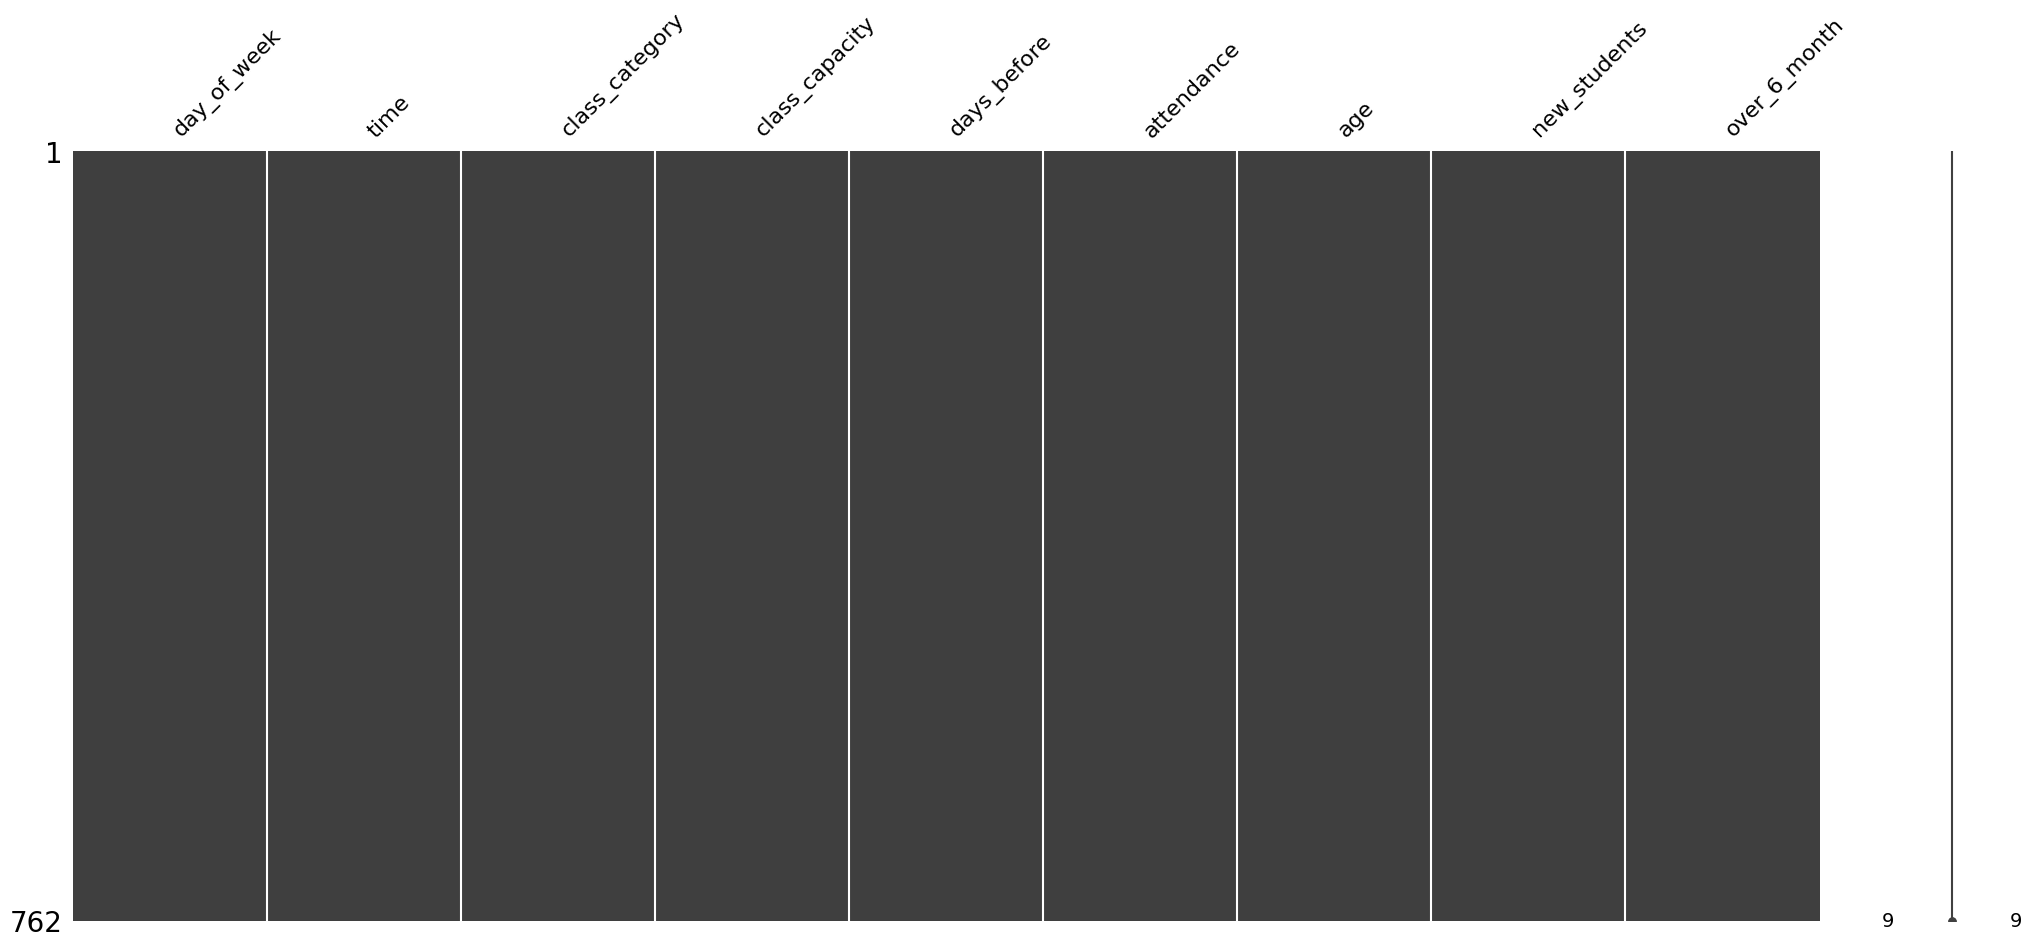

In [ ]:
## checking for missing values using missingno

import missingno as msno
import matplotlib.pyplot as plt
# Visualize missingness
msno.matrix(df)
plt.show()

# the graph below shows that there are no missing values 

In [ ]:
## Data Quality Report for continous and categorical variables 

In [ ]:
df.select_dtypes(include=['int','float']).describe()

,class_capacity,days_before,attendance,age,new_students,over_6_month
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,17.506562,2.547244,9.519685,29.163648,5.912073,7.565617
std,4.336755,1.355768,3.841164,5.812547,1.788821,1.968617
min,15.000000,1.000000,4.000000,14.000000,1.000000,2.000000
25%,15.000000,1.000000,7.000000,25.300000,5.000000,6.000000
50%,15.000000,2.000000,9.000000,29.000000,6.000000,8.000000
75%,22.500000,4.000000,11.000000,33.200000,7.000000,9.000000
max,25.000000,5.000000,21.000000,48.800000,11.000000,13.000000


In [ ]:
df1= df.select_dtypes(include=['int','float'])
d= {}
for col in df1.columns: 
    d[col] = [df1[col].nunique()]
print(d)

{'class_capacity': [2], 'days_before': [5], 'attendance': [18], 'age': [231], 'new_students': [11], 'over_6_month': [12]}


In [ ]:
## from here we can see that class capacity and day_before cardinality is too low wrt to continous features. So we can convert class_capacity features into nominal data. for days_before we are not converting because we might need to calcuated average days booked etc. in our analysis. 


In [ ]:
# converting class capacity into category 
df['class_capacity'] = df['class_capacity'].astype('category')

In [ ]:
df.select_dtypes(exclude=['int','float']).describe()

,day_of_week,time,class_category,class_capacity
count,762,762,762,762
unique,7,2,5,2
top,Thu,PM,Yoga,15
freq,126,395,173,571


In [ ]:
# In our analysis attendence is the target variable in our model. 

## EDA 

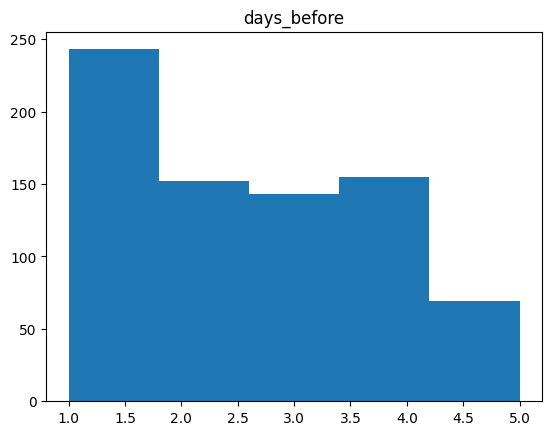

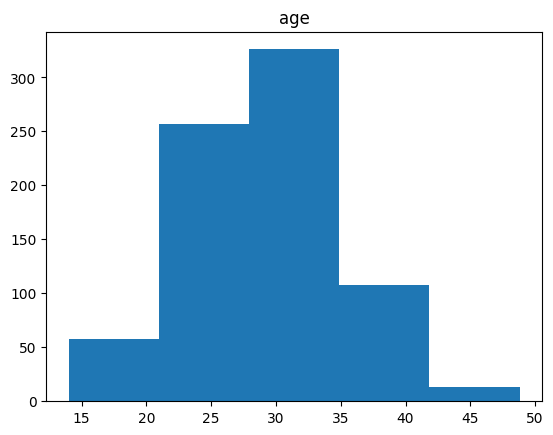

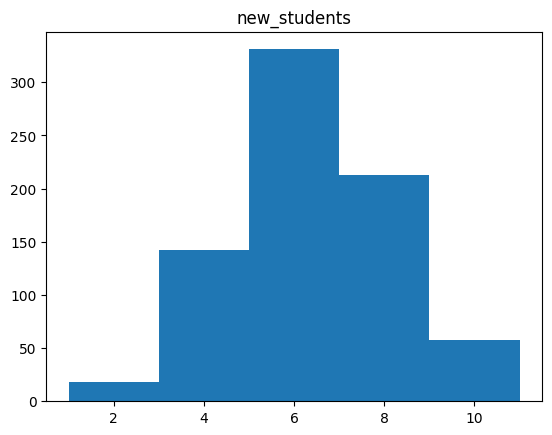

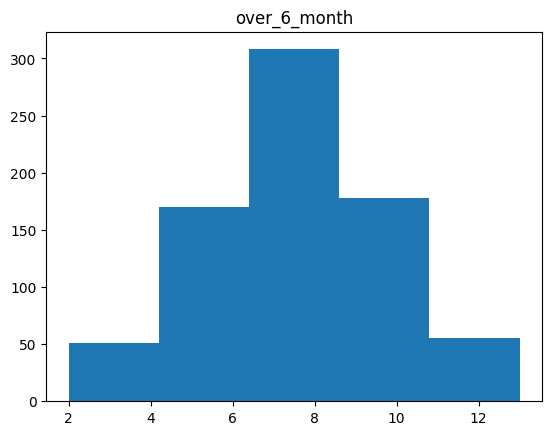

In [ ]:
# Checking the distribution for continous features as this will give us idea which features are skewed or normal 

df1= df.select_dtypes(include=['int','float'])
for col in df1.columns:
    if col != 'attendance':
     plt.hist(df[col], bins= 5)
     plt.title(col)
     plt.show()

In [ ]:
## from the histogram above we can see that days before is not normally distributed. Infact it seems to be right skewed. Rest all features are normally distributed. 

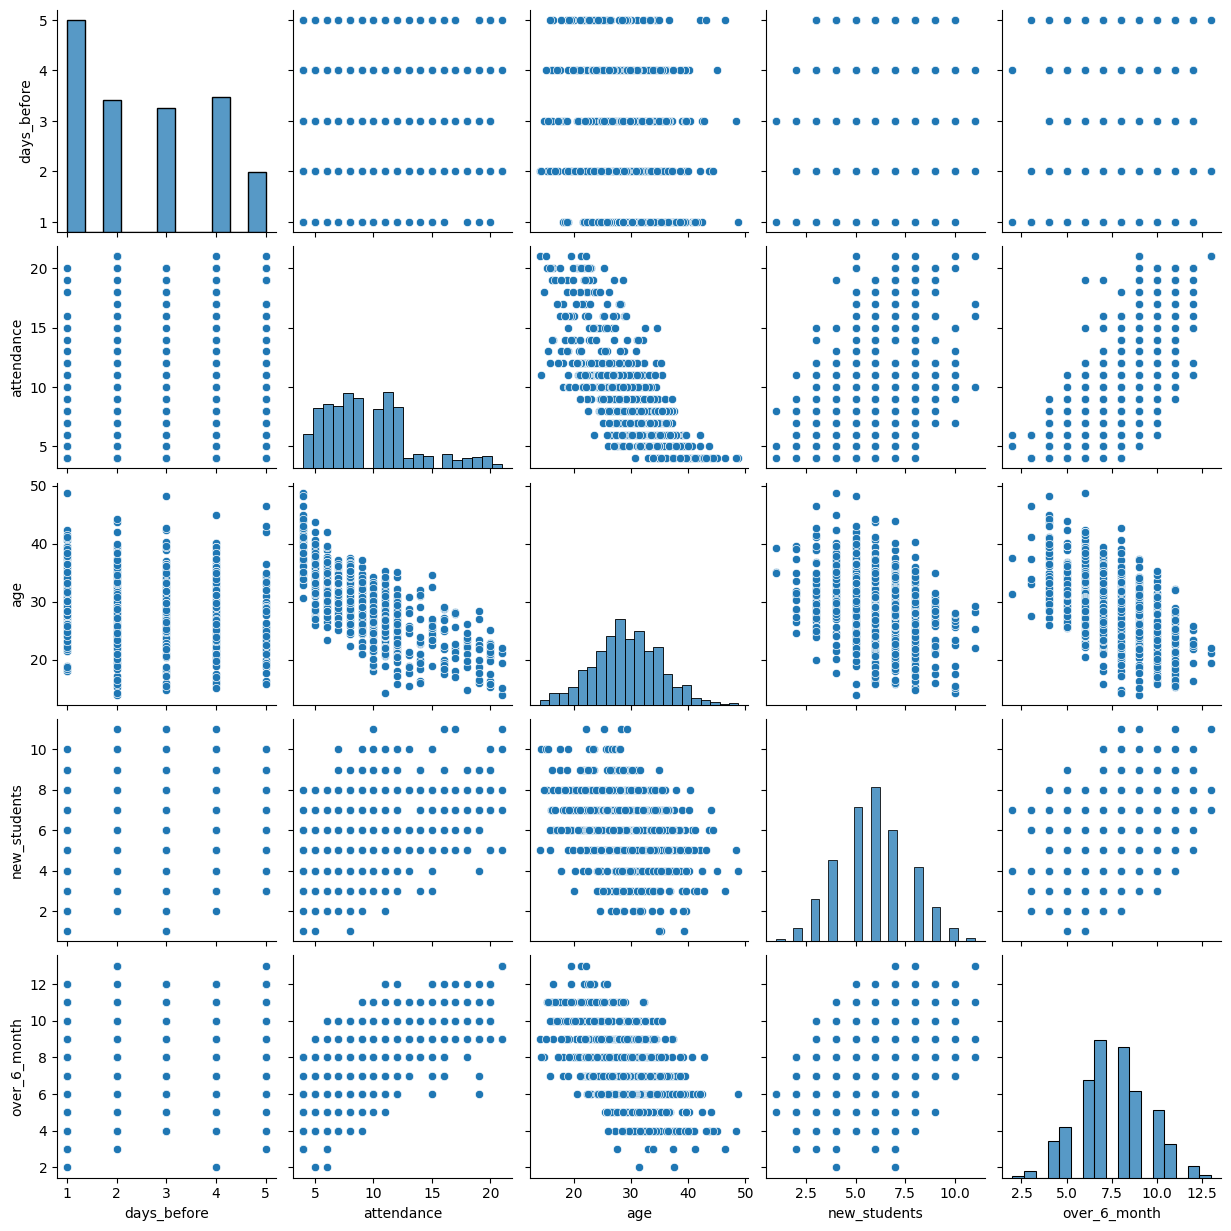

In [ ]:
## we will create pairplot to see if there is no multicollinearity between different continous features. 

sns.pairplot(df1)

In [ ]:
df1.corr()

,days_before,attendance,age,new_students,over_6_month
days_before,1.000000,0.272084,-0.213646,0.142320,0.183220
attendance,0.272084,1.000000,-0.734209,0.463347,0.694935
age,-0.213646,-0.734209,1.000000,-0.375154,-0.568190
new_students,0.142320,0.463347,-0.375154,1.000000,0.360801
over_6_month,0.183220,0.694935,-0.568190,0.360801,1.000000


## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

*Write your description here*
1. from the histogram above we can see that days before is not normally distributed. Infact it seems to be right skewed. Rest all features are normally distributed.
2. from the pair plot above and correlation coefficient above we can see that attendance is negatively related with age with correlation coefficient -0.734. Also, it is linearly correlated with new students and over 6 months. with respect to multicollinearity, there is no such feature. A linear relationship was observed between over 6months and new students but from correlation table, they are not so related. 
3.with respect to box plot above, we cna see that there is relationship between attendance and class_Capacity. with respect to class category the median values are almost similar and same goes for day_of_week also. To find that if there is any relationship between attendance and these two category we will also cross check using pairwise anova test.where;

H0: there is no difference in attendance wrt to different groups in categorical feature
Ha: there is difference in attendance wrt different groups 
significance level is set at : 0.05
after conducting the anova test for these two features we can see none of the p-value are less than significance level. from there we can say that we fail to reject the null hypothesis. That is there no such significant difference between two groups. Hence in modelling, we will not be considering day_of_week and class_category features.


